## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


Init Plugin
Init Graph Optimizer
Init Kernel


## Displaying Images

In [2]:
picture_size = 48
folder_path = "/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/"

## Making Training and Validation Data

In [3]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model Building

In [5]:
# from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1


2021-12-11 19:27:41.139859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-11 19:27:41.140518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## Fitting the Model with Training and Validation Data

In [6]:

checkpoint = ModelCheckpoint(folder_path+"/model7new.h4", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=15,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 60

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-12-11 19:28:14.128258: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-11 19:28:14.130019: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/60


2021-12-11 19:28:14.652262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - ETA: 0s - loss: 1.9064 - accuracy: 0.2512

2021-12-11 19:29:11.257423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - 60s 241ms/step - loss: 1.9064 - accuracy: 0.2512 - val_loss: 2.8230 - val_accuracy: 0.2193

Epoch 00001: val_accuracy improved from -inf to 0.21931, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7


2021-12-11 19:29:15.011451: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7/assets
Epoch 2/60
224/224 [==============================] - 56s 248ms/step - loss: 1.6139 - accuracy: 0.3779 - val_loss: 1.7338 - val_accuracy: 0.3407

Epoch 00002: val_accuracy improved from 0.21931 to 0.34068, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7
INFO:tensorflow:Assets written to: /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7/assets
Epoch 3/60
224/224 [==============================] - 56s 248ms/step - loss: 1.4329 - accuracy: 0.4514 - val_loss: 1.7654 - val_accuracy: 0.2987

Epoch 00003: val_accuracy did not improve from 0.34068
Epoch 4/60
224/224 [==============================] - 53s 238ms/step - loss: 1.3172 - accuracy: 0.4953 - val_loss: 1.6925 - val_accuracy: 0.3203

Epoch 00004: val_accuracy did not improve from 0.34068
Epoch 5/60
224/224 [=====


Epoch 00026: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Epoch 27/60
224/224 [==============================] - 56s 251ms/step - loss: 0.5042 - accuracy: 0.8158 - val_loss: 1.0403 - val_accuracy: 0.6684

Epoch 00027: val_accuracy improved from 0.66797 to 0.66839, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7
INFO:tensorflow:Assets written to: /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/model.h7/assets
Epoch 28/60
224/224 [==============================] - 57s 255ms/step - loss: 0.5025 - accuracy: 0.8183 - val_loss: 1.0404 - val_accuracy: 0.6681

Epoch 00028: val_accuracy did not improve from 0.66839
Epoch 29/60
224/224 [==============================] - 54s 239ms/step - loss: 0.5006 - accuracy: 0.8189 - val_loss: 1.0409 - val_accuracy: 0.6681

Epoch 00029: val_accuracy did not improve from 0.66839

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.600000177859

## Plotting Accuracy & Loss

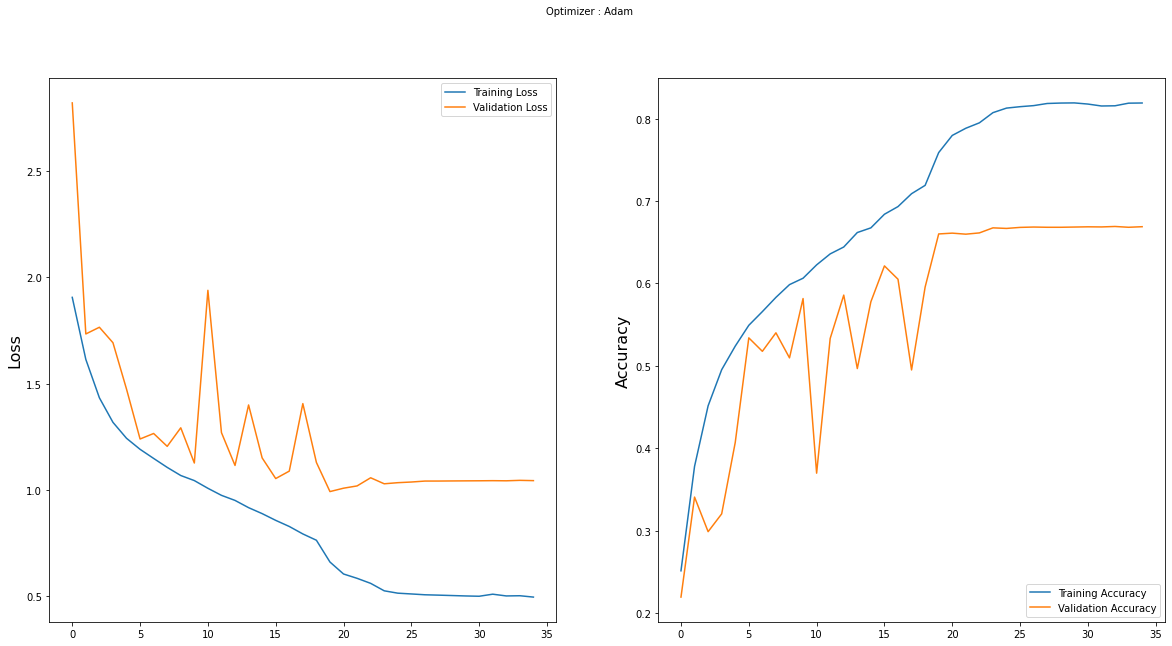

In [8]:
# plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()